# Search image in the Dataset

With this notebook you can search for photos using natural language.

## Load the dataset

You will need the Unsplash Dataset and the precomputed feature vetors for this. You don't want to process the whole dataset yourself, you can download the preprocessed feature vectors from [here](https://drive.google.com/drive/folders/1ozUUr8UQ2YWDSJyYIIun9V8Qg1TjqXEs?usp=sharing).

In [ ]:
class demo_searcher:
    def __init__(self):
        

In [2]:
import numpy as np
import pandas as pd
from os.path import join

# Set the paths
unsplash_dataset_path = "/home/agent_h/data/unsplash-research-dataset-lite-latest/"
features_path = "/home/agent_h/data/unsplash-research-dataset-lite-latest/features/"
photos = pd.read_csv(join(unsplash_dataset_path,"photos.tsv000"), sep='\t', header=0)

# Load the features and the corresponding IDs
photo_features = np.load(join(features_path,"features.npy"))
photo_ids = pd.read_csv(join(features_path,"photo_ids.csv"))
photo_ids = list(photo_ids['photo_id'])
print(len(photo_ids))

24844


## Load the CLIP network.

In [3]:
import clip
import torch

# Load the open CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

## Search

Specify your search query and encode it to a feature vector using CLIP.

49688
QUERY:  woman and children walking in the city at 8pm at night
/home/agent_h/data/unsplash-research-dataset-lite-latest/photos_640/7kw8x4SdAVw


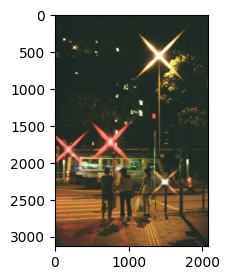

QUERY:  woman and children walking in the city at 8pm at night
/home/agent_h/data/unsplash-research-dataset-lite-latest/photos_640/9EMpkQwelbc


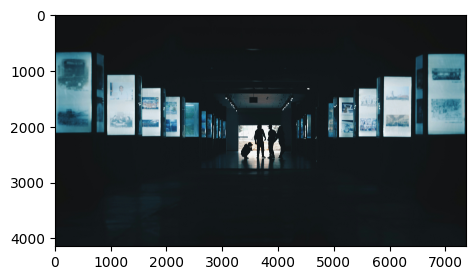

QUERY:  woman and children walking in the city at 8pm at night
/home/agent_h/data/unsplash-research-dataset-lite-latest/photos_640/shb8l1o-0Zk


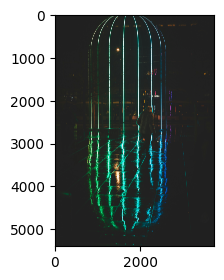

QUERY:  woman and children walking in the city at 8pm at night
/home/agent_h/data/unsplash-research-dataset-lite-latest/photos_640/AZVG-xEZioM


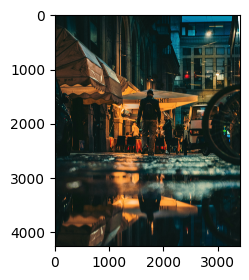

QUERY:  woman and children walking in the city at 8pm at night
/home/agent_h/data/unsplash-research-dataset-lite-latest/photos_640/X7x8WkwMFb8


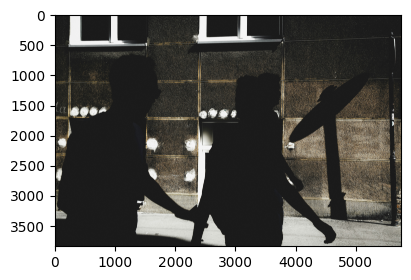

In [7]:
from glob import glob
from os.path import join, basename
import cv2
from tqdm import tqdm
import ht2
import numpy as np
import matplotlib.pyplot as plt

search_query = "woman and children walking in the city at 8pm at night"

with torch.no_grad():
    # Encode and normalize the description using CLIP
    text_encoded = model.encode_text(clip.tokenize(search_query).to(device))
    text_encoded /= text_encoded.norm(dim=-1, keepdim=True)

# Retrieve the description vector and the photo vectors
text_features = text_encoded.cpu().numpy()
# Compute the similarity between the descrption and each photo using the Cosine similarity
similarities = list((text_features @ photo_features.T).squeeze(0))
# Sort the photos by their similarity score
best_photos = sorted(zip(similarities, range(photo_features.shape[0])), key=lambda x: x[0], reverse=True)
# print(best_photos)
print(len(best_photos))

def show_img_np(img, max_h=3, max_w=20, save=False, cmap='gray'):
    """
    :param np_array: input image, one channel or 3 channel,
    :param save: if save image
    :param size:
    :return:
    """
    if len(img.shape) < 3:
        plt.rcParams['image.cmap'] = cmap
    plt.figure(figsize=(max_w, max_h), facecolor='w', edgecolor='k')
    plt.imshow(img)
    if save:
        cv2.imwrite('debug.png', img)
    else:
        plt.show()


# Iterate over the top 3 results
for i in range(10):
    # Retrieve the photo ID
    idx = best_photos[i][1]
    if idx < len(photo_ids):
        photo_id = photo_ids[idx]
        path = join("/home/agent_h/data/unsplash-research-dataset-lite-latest/photos/",basename(photo_id)+".jpg")
        print("QUERY: ", search_query)
        print(photo_id)
        
        show_img_np(cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB),max_h = 3)

    
    